## Import dependencies and load csv 
Import pandas, matplotlib, seaborn, and datetime dependencies

In [1]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/raw.csv')

In [3]:
df.head(10)

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada
5,U10000,01/10/2019,15/10/2019,0,16,Canada
6,U10001,01/10/2019,01/10/2019,1,134,Canada
7,U10001,01/10/2019,02/10/2019,2,60,Canada
8,U10001,01/10/2019,03/10/2019,0,55,Canada
9,U10001,01/10/2019,04/10/2019,1,77,Canada


## Format date columns and add seniority 
Seniority tells us how long the user has used our app. 1 = 1 day, 10 = 10 days

In [4]:
df.signup_date = pd.to_datetime(df.signup_date, format='%d/%m/%Y')
df.ref_date = pd.to_datetime(df.ref_date, format='%d/%m/%Y')

In [5]:
df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   username     822 non-null    object        
 1   signup_date  822 non-null    datetime64[ns]
 2   ref_date     822 non-null    datetime64[ns]
 3   money        822 non-null    int64         
 4   time         822 non-null    int64         
 5   country      822 non-null    object        
 6   seniority    822 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 45.1+ KB


## Group users by country
Split dataframe by countries to compare retention rates across the globe for our app.

In [7]:
usa = df[df.country=='United States']
usa

,username,signup_date,ref_date,money,time,country,seniority
12,U10002,2019-10-01,2019-10-01,0,110,United States,1
13,U10002,2019-10-01,2019-10-04,1,51,United States,4
14,U10002,2019-10-01,2019-10-11,1,81,United States,11
15,U10002,2019-10-01,2019-10-12,0,21,United States,12
16,U10003,2019-10-01,2019-10-01,2,112,United States,1
...,...,...,...,...,...,...,...
808,U10155,2019-10-14,2019-10-15,2,52,United States,2
813,U10159,2019-10-15,2019-10-15,1,63,United States,1
815,U10161,2019-10-15,2019-10-15,2,206,United States,1
818,U10164,2019-10-15,2019-10-15,1,50,United States,1


In [8]:
canada = df[df.country=='Canada']
canada

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12
...,...,...,...,...,...,...,...
810,U10156,2019-10-14,2019-10-15,2,4,Canada,2
814,U10160,2019-10-15,2019-10-15,2,84,Canada,1
816,U10162,2019-10-15,2019-10-15,2,91,Canada,1
820,U10166,2019-10-15,2019-10-15,1,49,Canada,1


In [9]:
brazil = df[df.country=='Brazil']
brazil

,username,signup_date,ref_date,money,time,country,seniority
77,U10011,2019-10-02,2019-10-02,1,146,Brazil,1
78,U10011,2019-10-02,2019-10-03,0,2,Brazil,2
79,U10011,2019-10-02,2019-10-05,0,30,Brazil,4
80,U10011,2019-10-02,2019-10-08,0,20,Brazil,7
81,U10011,2019-10-02,2019-10-14,0,59,Brazil,13
...,...,...,...,...,...,...,...
777,U10139,2019-10-13,2019-10-15,0,25,Brazil,3
792,U10146,2019-10-13,2019-10-13,1,195,Brazil,1
793,U10146,2019-10-13,2019-10-15,2,138,Brazil,3
812,U10158,2019-10-15,2019-10-15,1,84,Brazil,1


In [10]:
mexico = df[df.country=='Mexico']
mexico

,username,signup_date,ref_date,money,time,country,seniority
42,U10006,2019-10-01,2019-10-01,0,46,Mexico,1
43,U10006,2019-10-01,2019-10-02,0,62,Mexico,2
44,U10006,2019-10-01,2019-10-05,1,60,Mexico,5
45,U10006,2019-10-01,2019-10-10,2,118,Mexico,10
46,U10006,2019-10-01,2019-10-13,1,14,Mexico,13
...,...,...,...,...,...,...,...
785,U10142,2019-10-13,2019-10-15,0,25,Mexico,3
790,U10145,2019-10-13,2019-10-13,0,136,Mexico,1
791,U10145,2019-10-13,2019-10-14,2,53,Mexico,2
795,U10148,2019-10-14,2019-10-14,3,132,Mexico,1


## Group by cohort_data and calculate user count
Analyze retention and churn by conducting a cohort analysis and grouping by seniority and signup dates for each country. Each cohort will contain users that signed up on the same day/week/month/etc. 

Group by signup_date and seniority, then by username for each country. Calculate the size of users to see how retention rate changes over time. Then generate pivot tables for each country to see how many users drop over time. 

In [29]:
group_usa = usa.groupby(['signup_date', 'seniority'])
cohort_data_usa = group_usa['username'].size()
cohort_data_usa = cohort_data_usa.reset_index()
cohort_data_usa

,signup_date,seniority,username
0,2019-10-01,1,3
1,2019-10-01,2,2
2,2019-10-01,3,2
3,2019-10-01,4,3
4,2019-10-01,5,2
...,...,...,...
85,2019-10-13,2,4
86,2019-10-13,3,6
87,2019-10-14,1,7
88,2019-10-14,2,6


In [30]:
cohort_counts_usa = cohort_data_usa.pivot(index='signup_date', columns='seniority',values='username')
cohort_counts_usa

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,3.0,2.0,2.0,3.0,2.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0
2019-10-02,2.0,1.0,2.0,2.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN
2019-10-03,2.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2019-10-05,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2019-10-06,3.0,3.0,3.0,2.0,1.0,1.0,3.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,5.0,4.0,4.0,4.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
group_canada = canada.groupby(['signup_date', 'seniority'])
cohort_data_canada = group_canada['username'].size()
cohort_data_canada = cohort_data_canada.reset_index()
cohort_data_canada

,signup_date,seniority,username
0,2019-10-01,1,5
1,2019-10-01,2,3
2,2019-10-01,3,3
3,2019-10-01,4,4
4,2019-10-01,5,3
...,...,...,...
97,2019-10-13,2,2
98,2019-10-13,3,3
99,2019-10-14,1,2
100,2019-10-14,2,1


In [33]:
cohort_counts_canada = cohort_data_canada.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_canada

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,5.0,3.0,3.0,4.0,3.0,1.0,2.0,2.0,3.0,3.0,1.0,1.0,2.0,1.0,2.0
2019-10-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2019-10-03,3.0,2.0,3.0,2.0,3.0,2.0,3.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
2019-10-04,4.0,3.0,4.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN
2019-10-05,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-06,2.0,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07,3.0,2.0,2.0,NaN,2.0,1.0,3.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,6.0,5.0,5.0,5.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
group_brazil = brazil.groupby(['signup_date', 'seniority'])
cohort_data_brazil = group_brazil['username'].size()
cohort_data_brazil = cohort_data_brazil.reset_index()
cohort_data_brazil

,signup_date,seniority,username
0,2019-10-02,1,4
1,2019-10-02,2,3
2,2019-10-02,3,2
3,2019-10-02,4,4
4,2019-10-02,5,1
...,...,...,...
82,2019-10-12,4,2
83,2019-10-13,1,2
84,2019-10-13,2,1
85,2019-10-13,3,2


In [35]:
cohort_counts_brazil = cohort_data_brazil.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_brazil

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-02,4.0,3.0,2.0,4.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0
2019-10-03,5.0,4.0,4.0,3.0,4.0,NaN,2.0,3.0,3.0,2.0,1.0,2.0,1.0,NaN
2019-10-04,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,3.0,NaN,NaN,NaN
2019-10-05,5.0,4.0,5.0,3.0,4.0,2.0,2.0,2.0,2.0,4.0,1.0,NaN,NaN,NaN
2019-10-07,4.0,4.0,4.0,2.0,3.0,4.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-08,3.0,3.0,3.0,1.0,2.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-10,3.0,2.0,3.0,3.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-11,5.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
group_mexico = mexico.groupby(['signup_date', 'seniority'])
cohort_data_mexico = group_mexico['username'].size()
cohort_data_mexico = cohort_data_mexico.reset_index()
cohort_data_mexico

,signup_date,seniority,username
0,2019-10-01,1,1
1,2019-10-01,2,1
2,2019-10-01,5,1
3,2019-10-01,10,1
4,2019-10-01,13,1
...,...,...,...
85,2019-10-12,4,1
86,2019-10-13,1,2
87,2019-10-13,2,2
88,2019-10-13,3,1


In [52]:
cohort_counts_mexico = cohort_data_mexico.pivot(index='signup_date', columns='seniority', values='username')
cohort_counts_mexico

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-01,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
2019-10-02,4.0,2.0,3.0,4.0,3.0,3.0,1.0,3.0,2.0,1.0,NaN,3.0,1.0,1.0
2019-10-03,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,7.0,5.0,2.0,5.0,6.0,3.0,3.0,3.0,2.0,1.0,1.0,2.0,NaN,NaN
2019-10-05,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN
2019-10-06,4.0,3.0,3.0,3.0,3.0,3.0,2.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-10-08,4.0,3.0,3.0,4.0,3.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,3.0,1.0,3.0,2.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Group by cohort_data and calculate retention rates

Group by signup_date and seniority, then by unique username for each country. Reset index and turn corhort data into a pivot table. Divide by the number of users the corhort started with on day 1 to get the retention rate for each seniority level. 

In [17]:
grouping = usa.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_usa = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_usa

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.667,1.000,0.667,0.333,NaN,0.333,NaN,0.333,0.333,0.333,0.333,0.333,0.333
2019-10-02,1.0,0.500,1.000,1.000,1.000,0.500,NaN,NaN,1.0,NaN,NaN,NaN,0.500,0.500,NaN
2019-10-03,1.0,1.000,0.500,0.500,1.000,0.500,NaN,NaN,NaN,0.500,NaN,NaN,0.500,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.000,1.000,NaN,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN
2019-10-05,1.0,0.500,1.000,1.000,1.000,1.000,NaN,0.500,0.5,0.500,0.500,NaN,NaN,NaN,NaN
2019-10-06,1.0,1.000,1.000,0.667,0.333,0.333,1.0,0.333,NaN,0.667,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,1.000,NaN,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.800,0.800,0.800,0.600,0.200,0.2,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
grouping = canada.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_canada = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_canada

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.600,0.600,0.800,0.600,0.200,0.40,0.400,0.600,0.60,0.200,0.2,0.4,0.2,0.4
2019-10-02,1.0,1.000,1.000,1.000,1.000,1.000,1.00,NaN,1.000,NaN,1.000,NaN,1.0,NaN,NaN
2019-10-03,1.0,0.667,1.000,0.667,1.000,0.667,1.00,NaN,0.333,NaN,0.667,NaN,NaN,NaN,NaN
2019-10-04,1.0,0.750,1.000,0.750,0.500,0.750,0.25,0.250,0.500,0.25,0.250,NaN,NaN,NaN,NaN
2019-10-05,1.0,1.000,NaN,1.000,1.000,1.000,NaN,1.000,1.000,1.00,NaN,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.500,1.000,1.000,0.500,0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.667,0.667,NaN,0.667,0.333,1.00,0.333,0.667,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.500,0.500,0.500,0.500,1.000,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.833,0.833,0.833,0.333,0.667,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
grouping = brazil.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_brazil = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_brazil

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-02,1.0,0.750,0.500,1.000,0.250,0.750,0.750,0.500,0.500,0.250,0.5,0.25,1.0,0.25
2019-10-03,1.0,0.800,0.800,0.600,0.800,NaN,0.400,0.600,0.600,0.400,0.2,0.40,0.2,NaN
2019-10-04,1.0,1.000,1.000,1.000,1.000,0.667,1.000,0.333,0.333,0.333,1.0,NaN,NaN,NaN
2019-10-05,1.0,0.800,1.000,0.600,0.800,0.400,0.400,0.400,0.400,0.800,0.2,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,0.500,0.750,1.000,0.500,0.750,0.250,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,1.000,1.000,0.333,0.667,0.333,0.333,0.667,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-10,1.0,0.667,1.000,1.000,1.000,0.667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-11,1.0,0.800,0.400,0.600,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
grouping = mexico.groupby(['signup_date','seniority'])
cohort_data = grouping['username'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='signup_date', columns='seniority', values='username')
retention_mexico = cohort_counts.divide(cohort_counts[1], axis=0).round(3)
retention_mexico

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14
signup_date,,,,,,,,,,,,,,
2019-10-01,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN,1.000,NaN,NaN,1.00,NaN
2019-10-02,1.0,0.500,0.750,1.000,0.750,0.750,0.250,0.750,0.500,0.250,NaN,0.750,0.25,0.25
2019-10-03,1.0,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04,1.0,0.714,0.286,0.714,0.857,0.429,0.429,0.429,0.286,0.143,0.143,0.286,NaN,NaN
2019-10-05,1.0,0.750,1.000,0.500,1.000,1.000,0.500,0.500,0.250,0.500,0.250,NaN,NaN,NaN
2019-10-06,1.0,0.750,0.750,0.750,0.750,0.750,0.500,NaN,0.750,0.250,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,NaN,1.000,1.000,NaN,NaN,1.000,1.000,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.750,0.750,1.000,0.750,1.000,0.750,0.250,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.333,1.000,0.667,0.333,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Generate heatmaps for each country
Generate two different heatmaps for each country; active users and retention rate. Active users will tell us how many users who signed up on a specifc date return as the days pass. Retention rate will give us the percentage of users returning for each signup_date.

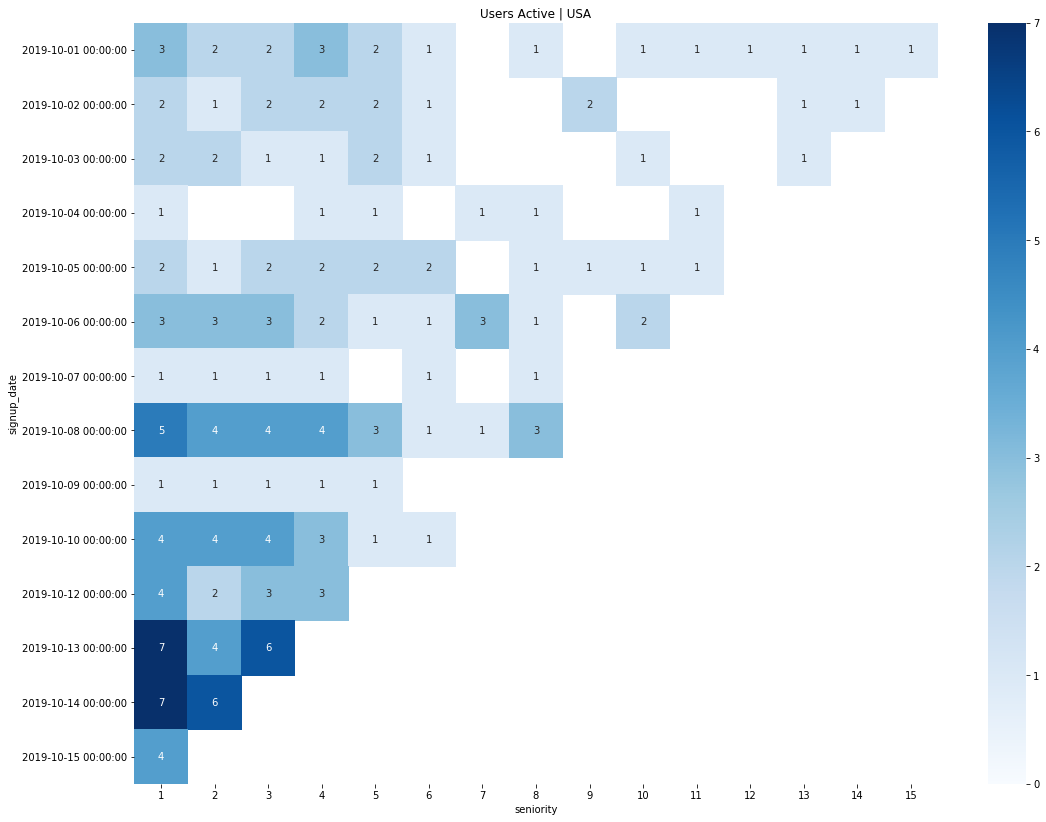

In [41]:
# USA Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | USA')
ax = sns.heatmap(data=cohort_counts_usa, annot=True, vmin=0.0, cmap = 'Blues')
ax.set_yticklabels(cohort_counts_usa.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_USA.png")
plt.show()

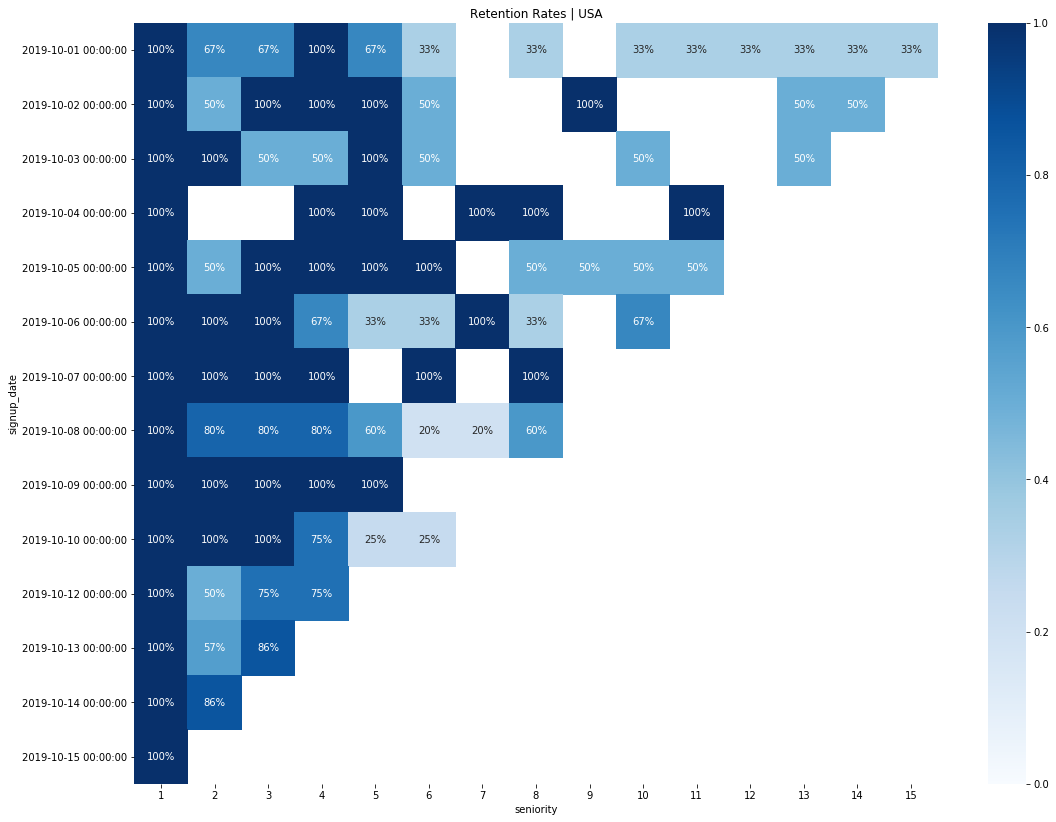

In [44]:
# USA Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | USA')
ax = sns.heatmap(data=retention_usa, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Blues')
ax.set_yticklabels(retention_usa.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_USA.png")
plt.show()

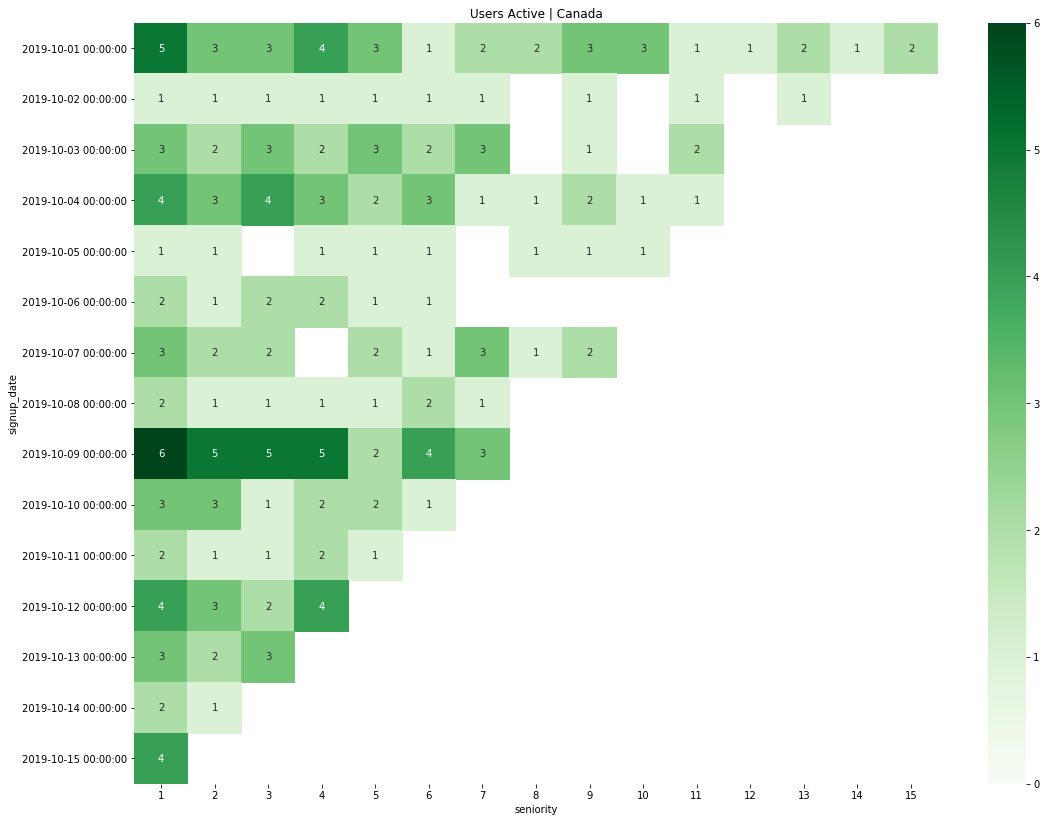

In [46]:
# Canada Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Canada')
ax = sns.heatmap(data=cohort_counts_canada, annot=True, vmin=0.0, cmap = 'Greens')
ax.set_yticklabels(cohort_counts_canada.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Canada.png")
plt.show()

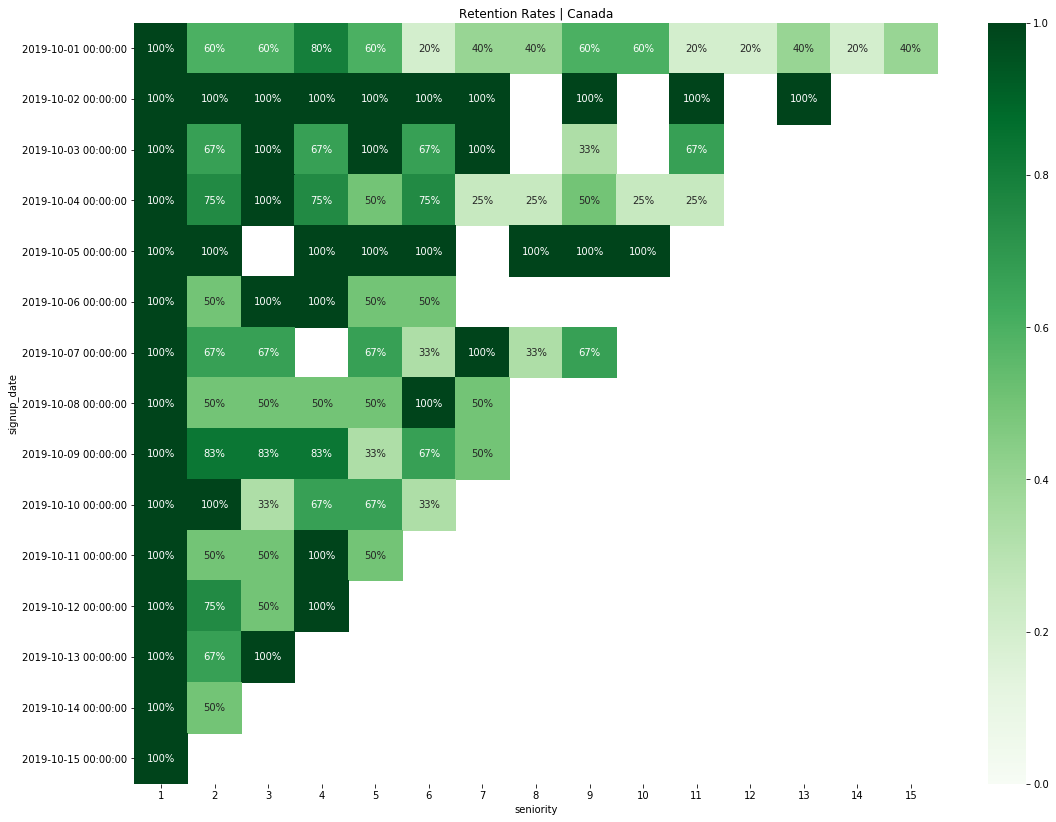

In [47]:
# Canada Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Canada')
ax = sns.heatmap(data=retention_canada, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Greens')
ax.set_yticklabels(retention_canada.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Canada.png")
plt.show()

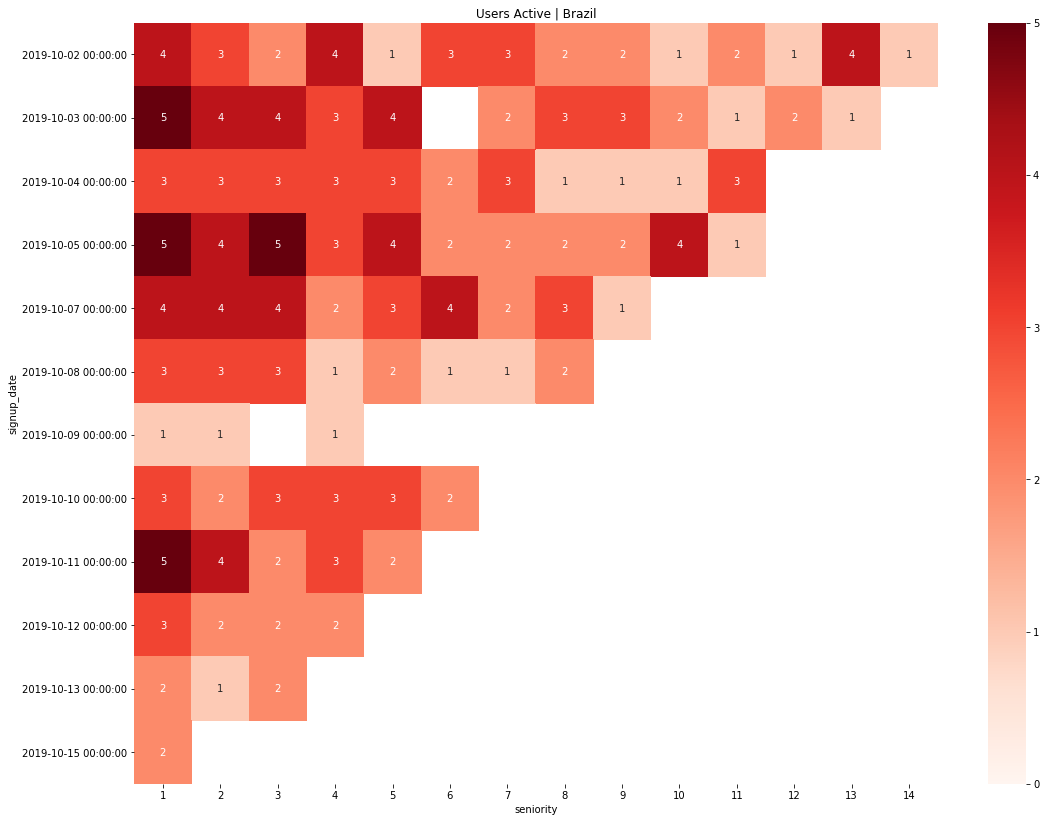

In [48]:
# Brazil Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Brazil')
ax = sns.heatmap(data=cohort_counts_brazil, annot=True, vmin=0.0, cmap = 'Reds')
ax.set_yticklabels(cohort_counts_brazil.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Brazil.png")
plt.show()

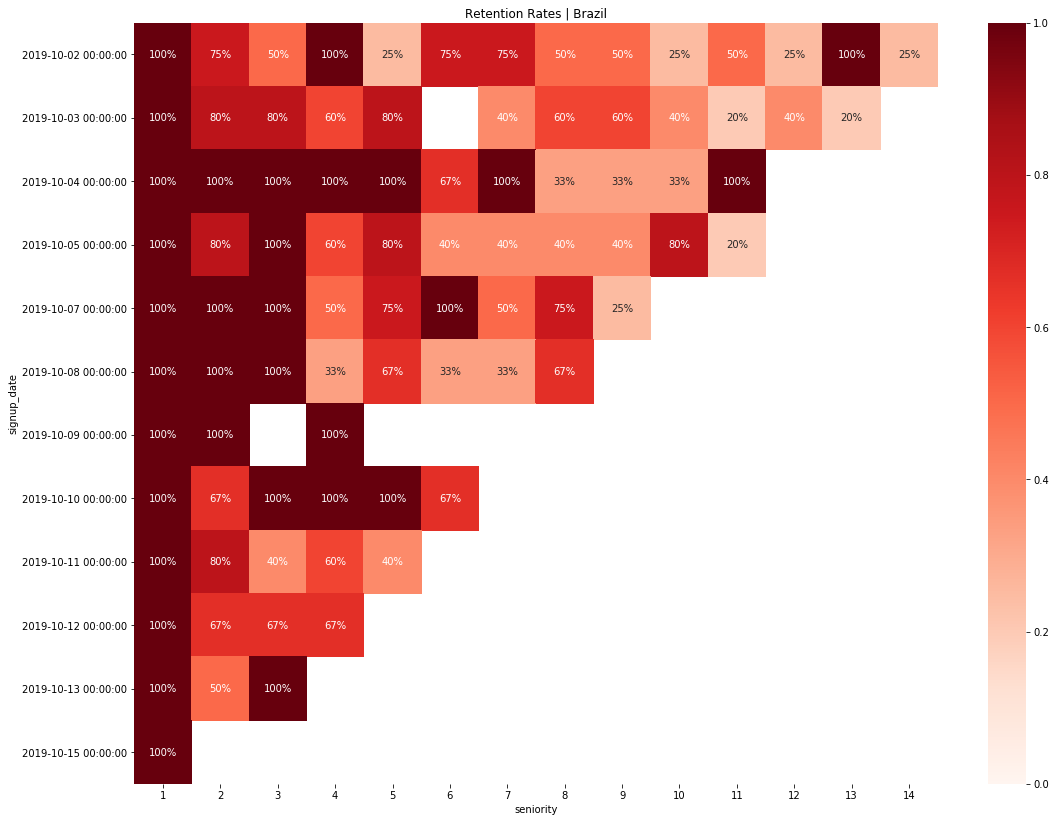

In [49]:
# Brazil Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Brazil')
ax = sns.heatmap(data=retention_brazil, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention_brazil.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Brazil.png")
plt.show()

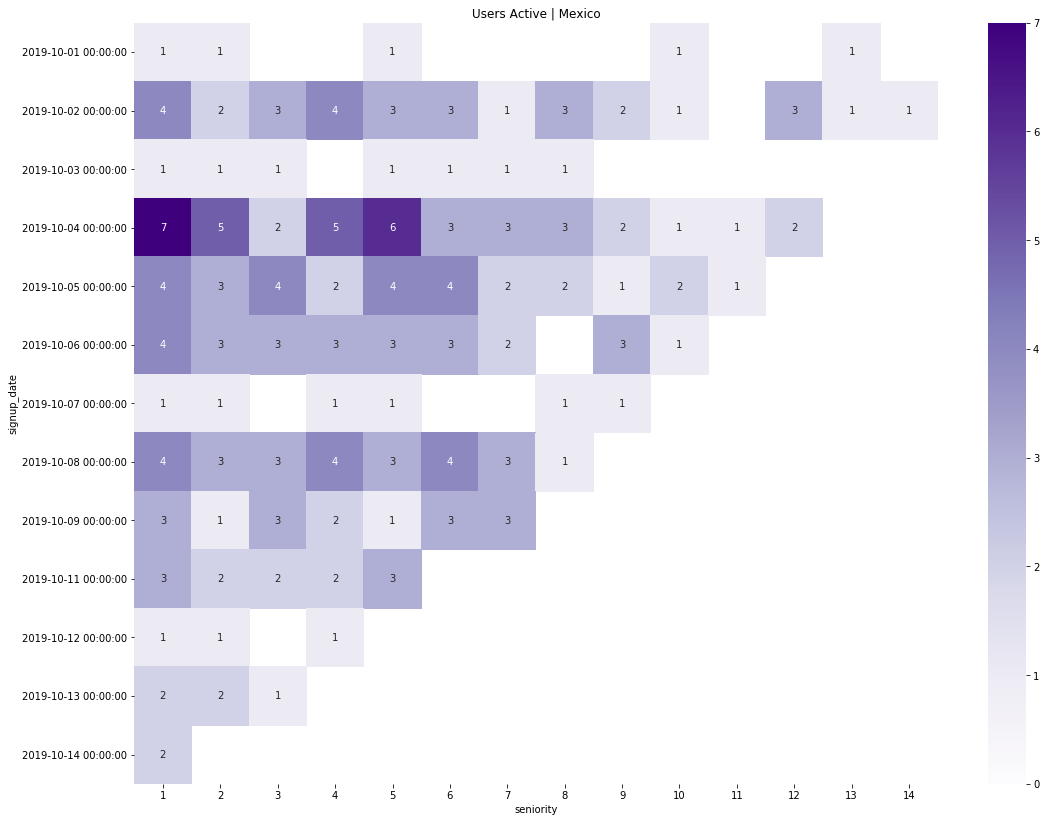

In [59]:
# Mexico Active Users Plot
plt.figure(figsize=(18,14))
plt.title('Users Active | Mexico')
ax = sns.heatmap(data=cohort_counts_mexico, annot=True, vmin=0.0, cmap = 'Purples')
ax.set_yticklabels(cohort_counts_mexico.index)
fig=ax.get_figure()
fig.savefig("../figures/Users_Active_Mexico.png")
plt.show()

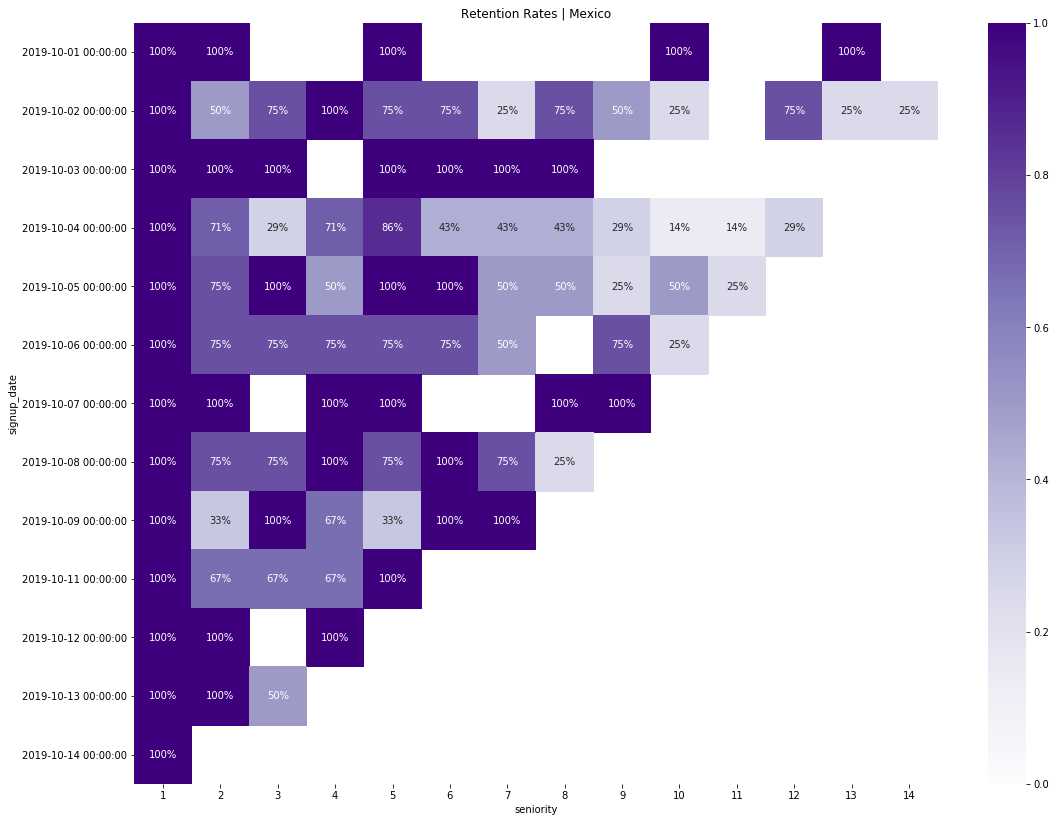

In [60]:
# Mexico Retention Rates Plot
plt.figure(figsize=(18,14))
plt.title('Retention Rates | Mexico')
ax = sns.heatmap(data=retention_mexico, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Purples')
ax.set_yticklabels(retention_mexico.index)
fig=ax.get_figure()
fig.savefig("../figures/Retention_Rates_Mexico.png")
plt.show()

## Connect to SQL Database
Use SQLAlchemy to connect to a SQL database and generate tables.

In [11]:
import sys
sys.path.append('../')
from config import db_user, db_password, db_host, db_port, db_name
from sqlalchemy import create_engine, inspect

In [12]:
# configure the connection string
rds_connection_string = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
        
# connect to the database
engine = create_engine(rds_connection_string)
conn = engine.connect()

In [13]:
#Append data to tables
usa.to_sql(name='usa', con=conn, if_exists='append', index=False)

In [14]:
canada.to_sql(name='canada', con=conn, if_exists='append', index=False)

In [15]:
brazil.to_sql(name='brazil', con=conn, if_exists='append', index=False)

In [16]:
mexico.to_sql(name='mexico', con=conn, if_exists='append', index=False)

In [17]:
# Use inspector to find table names
Inspector = inspect(engine)
Inspector.get_table_names()

['usa', 'canada', 'brazil', 'mexico']

In [18]:
# Check USA table
pd.read_sql_query('select * from usa', con=conn).head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10002,2019-10-01,2019-10-01,0,110,United States,1
1,U10002,2019-10-01,2019-10-04,1,51,United States,4
2,U10002,2019-10-01,2019-10-11,1,81,United States,11
3,U10002,2019-10-01,2019-10-12,0,21,United States,12
4,U10003,2019-10-01,2019-10-01,2,112,United States,1


In [20]:
# Query USA Table
pd.read_sql_query('select * from usa where seniority > 5', con=conn).head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10002,2019-10-01,2019-10-11,1,81,United States,11
1,U10002,2019-10-01,2019-10-12,0,21,United States,12
2,U10003,2019-10-01,2019-10-06,0,97,United States,6
3,U10003,2019-10-01,2019-10-10,0,98,United States,10
4,U10003,2019-10-01,2019-10-14,1,22,United States,14
